<a href="https://colab.research.google.com/github/npetitclerc/EnergyDataSimulationChallenge/blob/master/Coronavirus_response_ODMs_international2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coronavirus response ODMs 2

Later version - the timeline is getting long and the plots messy, so we need to modify them a bit. Rolling 7 days averages or weekly sums? 


In [0]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive_folder = "/content/drive/My Drive/colab/Nic/projects/coronavirus/Oslo.AI_plots/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pandas==0.25

In [4]:
import pandas as pd
pd.__version__

'0.25.0'

In [0]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

In [0]:
from matplotlib import cm
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [0]:
project_id = 'telia-ddi-no-prod'

In [0]:
def highlight_weekends(ax, timeseries):
    d = timeseries.dt
    ranges = timeseries[d.dayofweek >= 5].groupby(d.year * 100 + d.weekofyear).agg(['min', 'max'])
    for i, tmin, tmax in ranges.itertuples():
        ax.axvspan(tmin, tmax, facecolor='blue', edgecolor='none', alpha=0.1)

# Country responses/restrictions

https://www.theguardian.com/world/2020/mar/12/how-do-coronavirus-containment-measures-vary-across-europe







## Finland:

- State of emergency - March 16
https://valtioneuvosto.fi/en/article/-/asset_publisher/10616/hallitus-totesi-suomen-olevan-poikkeusoloissa-koronavirustilanteen-vuoksi

## Norway:

Ref. https://helsenorge.no/coronavirus/events-and-activities?redirect=false
https://www.helsedirektoratet.no/veiledere/koronavirus

- Schools and kindergarten closes
Thursday March 12th at 18:00 -> Fri 13th
- Closes additional businesses
16 March
https://www.helsedirektoratet.no/veiledere/koronavirus/naeringsliv-idrett-og-kultur/vedtak-om-a-stenge-ytterligere-virksomheter
- Ban on cabins
https://lovdata.no/dokument/LTI/forskrift/2020-03-19-355
March 20th

In [0]:
events_no = {'13-03-2020':' Schools\n kindergarten\n closes',
          #'16-03-2020':' Closes\n additional\n businesses',
          '20-03-2020':' Ban on\n cabins',
          '20-04-2020':' Barnehagen\n reopen\n Cabin ban\n lift',
          '27-04-2020':' Schools 1-4\n reopen',
          '2020-05-11':' All schools\n reopen'}

## Sweden:

- March 12 - Forbidden to hold public gatherings and events with more than 500 participants.
https://www.government.se/articles/2020/03/ordinance-on-a-prohibition-against-holding-public-gatherings-and-events/

In [0]:
events_swe = {'2020-03-12':' Ban on public\n gathering(500)',
              }

## Denmark:

- Schools and kindergarten closed March 12 
https://www.berlingske.dk/politik/regeringen-tager-historisk-skridt-danmark-lukker-ned

In [0]:
events_dk = {'2020-03-12':' Schools/kindergarten\n closes',
          }

## Finland:

- State of emergency - March 16
https://valtioneuvosto.fi/en/article/-/asset_publisher/10616/hallitus-totesi-suomen-olevan-poikkeusoloissa-koronavirustilanteen-vuoksi

In [0]:
events_fin = {'16-03-2020':' State of\n emergency',}

## Estonia:

https://news.err.ee/1063224/estonian-government-declares-emergency-situation-against-coronavirus

- State of emergency 12-03-2020
- Schools closed 16-03-2020

In [0]:
events_est = {'2020-03-12':' State of\n emergency',
              '16-03-2020':' Schools closes',
              '27-03-2020':' Shopping\n centres\n closed',
              '25-03-2020':' Public\n places\n closed'
              }

#Norway

Restrictions:
Ref. https://helsenorge.no/coronavirus/events-and-activities?redirect=false
https://www.helsedirektoratet.no/veiledere/koronavirus

- Schools and kindergarten closes
Thursday March 12th at 18:00 -> Fri 13th
- Closes additional businesses
16 March
https://www.helsedirektoratet.no/veiledere/koronavirus/naeringsliv-idrett-og-kultur/vedtak-om-a-stenge-ytterligere-virksomheter
- Ban on cabins
https://lovdata.no/dokument/LTI/forskrift/2020-03-19-355
March 20th



## Get Covid-19 statistics

Source:

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

In [14]:
files = ['confirmed', 'deaths', 'recovered']
covid19 = pd.DataFrame()
for f in files:
  url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{f}_global.csv"
  df_ = pd.read_csv(url)
  covid19 = covid19.append(df_[df_['Country/Region'] == 'Norway'])
covid19.index = files
useless_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
for u in useless_columns:
  del covid19[u]
covid19 = covid19.T
covid19.index = pd.DatetimeIndex(covid19.index)
covid19.tail(5)


confirmed  deaths  recovered
2020-05-19       8267     233         32
2020-05-20       8281     234         32
2020-05-21       8309     235         32
2020-05-22       8332     235       7727
2020-05-23       8346     235       7727

In [15]:
df_[df_['Country/Region'] == 'Norway']

Province/State Country/Region     Lat  ...  5/21/20  5/22/20  5/23/20
172            NaN         Norway  60.472  ...       32     7727     7727

[1 rows x 127 columns]

## Admin Level 2 - internal trips

In [0]:
country = 'no'
query = f"""    
SELECT
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code, SUM(people) AS trips
FROM 
    `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal2_dal2_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_2` as mapo
  ON mapo.admin_level_2_code	= origin_area_code
WHERE origin_area_code = destination_area_code
GROUP BY
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code
""" 

In [0]:
df = pd.read_gbq(query, project_id='telia-ddi-no-prod')

In [18]:
df['weekday'] = df['utc_day'].dt.weekday
df

utc_day admin_level_2  ...  trips  weekday
0     2020-03-03 00:00:00+00:00         Halsa  ...   3032        1
1     2020-03-03 00:00:00+00:00   Tvedestrand  ...   4062        1
2     2020-03-03 00:00:00+00:00          Bokn  ...   1398        1
3     2020-03-03 00:00:00+00:00     Samnanger  ...    996        1
4     2020-03-03 00:00:00+00:00         Røros  ...   5339        1
...                         ...           ...  ...    ...      ...
59325 2020-01-14 00:00:00+00:00       Skedsmo  ...  88633        1
59326 2020-01-14 00:00:00+00:00      Eidsberg  ...  10266        1
59327 2020-01-14 00:00:00+00:00      Trøgstad  ...   4599        1
59328 2020-01-14 00:00:00+00:00        Orkdal  ...  11293        1
59329 2020-01-14 00:00:00+00:00         Sande  ...    922        1

[59330 rows x 5 columns]

In [19]:
# For Pandas Version 1.0+
# gb = df.groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg(mean=('trips','mean'), median=('trips','median'), std=('trips','std'))
# But there was other issues, so let's just force Pandas version 0.25 for this notebook

# Old
#gb = df.groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'trips': {'mean': 'mean', 'median': 'median', 'std':'std'}})
#gb


# Finding weekday median
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
covid_date_start = pd.to_datetime('2020-02-20 00:00:00+00:00')
gb = df[(df['utc_day'] <= covid_date) & (df['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'trips': 'median'})
gb

trips
weekday admin_level_2_code admin_level_2            
0       1001               Kristiansand     195791.0
        1002               Mandal            17166.0
        1003               Farsund           12514.0
        1004               Flekkefjord        5002.0
        101                Halden            45997.0
...                                              ...
6       935                Iveland             338.0
        937                Evje og Hornnes     720.0
        938                Bygland             433.0
        940                Valle               917.0
        941                Bykle               846.0

[2954 rows x 1 columns]

In [20]:
#old
#df['diff_from_median'] = df.trips - gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
#df['sigma_from_median'] = np.abs(df['diff_from_median'] / gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), ('trips', 'std')].reset_index(drop=True))
#df['ratio_from_median'] = df.trips / gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
#df

df['diff_from_median'] = df.trips - gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), 'trips'].reset_index(drop=True)
df['sigma_from_median'] = np.abs(df['diff_from_median'] / gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), 'trips'].reset_index(drop=True))
df['ratio_from_median'] = df.trips / gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), 'trips'].reset_index(drop=True)
df

utc_day  ... ratio_from_median
0     2020-03-03 00:00:00+00:00  ...          1.000000
1     2020-03-03 00:00:00+00:00  ...          0.942897
2     2020-03-03 00:00:00+00:00  ...          1.158244
3     2020-03-03 00:00:00+00:00  ...          1.000000
4     2020-03-03 00:00:00+00:00  ...          1.000000
...                         ...  ...               ...
59325 2020-01-14 00:00:00+00:00  ...          1.519458
59326 2020-01-14 00:00:00+00:00  ...          0.955421
59327 2020-01-14 00:00:00+00:00  ...          1.002835
59328 2020-01-14 00:00:00+00:00  ...          0.950109
59329 2020-01-14 00:00:00+00:00  ...          0.805944

[59330 rows x 8 columns]

In [0]:
df['traffic_reduction'] = 1 - df.ratio_from_median
df['traffic_change'] = df.ratio_from_median - 1.0

## Select top cities

In [22]:
topc = df.groupby(['admin_level_2', 'admin_level_2_code'])['trips'].sum().reset_index().sort_values('trips', ascending=False).reset_index(drop=True)
topc.head(30)

admin_level_2 admin_level_2_code      trips
0           Oslo                301  182592071
1         Bergen               1201   74082009
2      Trondheim               5001   51239273
3      Stavanger               1103   26885886
4   Kristiansand               1001   23020507
5         Tromsø               1902   22972955
6          Bærum                219   22308389
7    Fredrikstad                106   17787587
8        Sandnes               1102   13992145
9        Drammen                602   12891011
10          Bodø               1804   12702174
11         Skien                806   12666251
12     Sarpsborg                105   11935241
13    Sandefjord                710   11306991
14       Ålesund               1504   11111328
15         Asker                220   10693740
16        Larvik                712    9960323
17      Tønsberg                704    9912837
18       Arendal                906    8926871
19       Skedsmo                231    8064062
20     Porsgrunn                805    7131970
21     Haugesund               1106    6993809
22        Karmøy               1149    6867569
23    Ullensaker                235    6808328
24         Hamar                403    6687474
25   Lillehammer                501    6155284
26     Ringerike                605    6056034
27        Halden                101    5748988
28     Ringsaker                412    5602549
29          Rana               1833    5540025

## Reduction Evolution in top municipalities

In [23]:
ntop = 10
#df_ = df[df.admin_level_2_code.isin(topc.head(ntop)['admin_level_2_code'].values)].sort_values('traffic_reduction', ascending=False)
df_ = df[df.admin_level_2_code.isin(topc.head(ntop)['admin_level_2_code'].values)].sort_values('traffic_change', ascending=False)

df_

utc_day  ... traffic_change
30555 2020-05-17 00:00:00+00:00  ...       0.283025
9403  2020-05-17 00:00:00+00:00  ...       0.268856
7154  2020-02-06 00:00:00+00:00  ...       0.204736
53254 2020-04-19 00:00:00+00:00  ...       0.198030
6152  2020-01-16 00:00:00+00:00  ...       0.195775
...                         ...  ...            ...
18259 2020-04-10 00:00:00+00:00  ...      -0.479920
12470 2020-04-09 00:00:00+00:00  ...      -0.481322
44706 2020-04-13 00:00:00+00:00  ...      -0.483740
27720 2020-04-13 00:00:00+00:00  ...      -0.502055
14956 2020-04-13 00:00:00+00:00  ...      -0.507208

[1410 rows x 10 columns]

### Plots

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


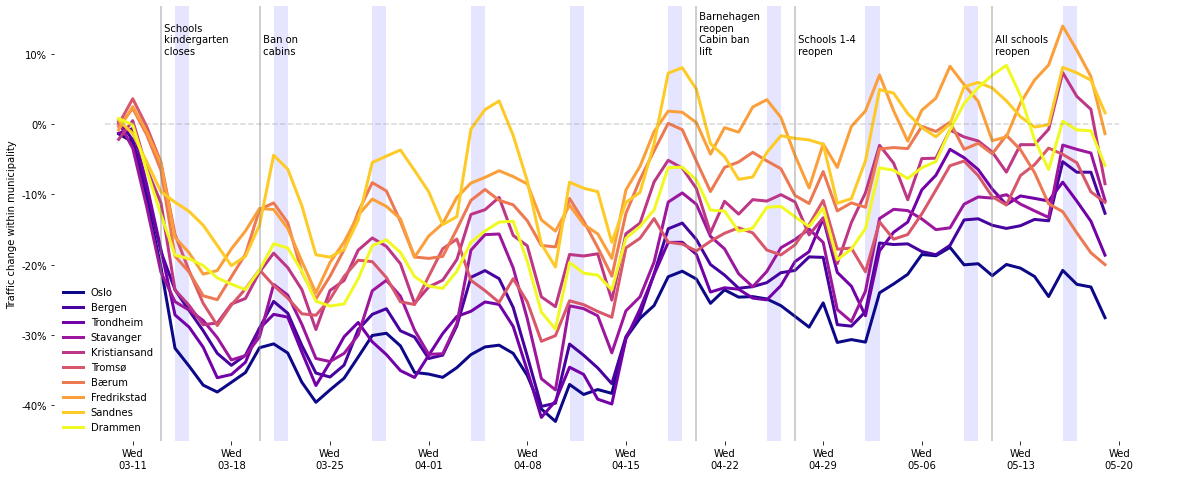

In [24]:
colormap = cm.get_cmap('plasma', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-09'
for i, m in enumerate(topc.head(ntop)['admin_level_2_code'].values):
  df__ = df_[(df_.admin_level_2_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_2'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  ax.plot(df__['utc_day'], df__['traffic_change_'], label=m_name, color=colormap(i), lw=3)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.5)
  plt.text(e, 0.10, events_no[e])
ax.set_ylabel('Traffic change within municipality')

ax.set_ylim(ax.get_ylim())#[::-1])
ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_Inner_Traffic_reduction_top10_muni.png')
plt.show()

## Admin Level 2 - external trips

### Outward trips

In [0]:
query = f"""    
SELECT
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code, SUM(people) AS trips
FROM `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal2_dal2_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_2` as mapo
  ON mapo.admin_level_2_code	= origin_area_code
WHERE origin_area_code != destination_area_code
GROUP BY
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code
""" 

In [0]:
df_out = pd.read_gbq(query, project_id='telia-ddi-no-prod')

In [27]:
df_out['weekday'] = df_out['utc_day'].dt.weekday
df_out

utc_day admin_level_2  ...  trips  weekday
0     2020-01-16 00:00:00+00:00         Halsa  ...   1423        3
1     2020-01-16 00:00:00+00:00        Malvik  ...  12341        3
2     2020-01-16 00:00:00+00:00        Alvdal  ...   1674        3
3     2020-01-16 00:00:00+00:00          Sola  ...  45849        3
4     2020-01-16 00:00:00+00:00       Ålesund  ...  27049        3
...                         ...           ...  ...    ...      ...
59477 2020-05-12 00:00:00+00:00       Kvitsøy  ...    607        1
59478 2020-05-12 00:00:00+00:00     Sykkylven  ...   2997        1
59479 2020-05-12 00:00:00+00:00        Lyngen  ...   1838        1
59480 2020-05-12 00:00:00+00:00        Strand  ...   6557        1
59481 2020-05-12 00:00:00+00:00         Måsøy  ...     52        1

[59482 rows x 5 columns]

In [28]:
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
covid_date_start = pd.to_datetime('2020-02-20 00:00:00+00:00')
#gb = df[(df['utc_day'] <= covid_date) & (df['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'trips': 'median'})
#gb
gb_out = df_out[(df_out['utc_day'] <= covid_date) & (df_out['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'trips': {'mean': 'mean', 'median': 'median', 'std':'std'}})
gb_out

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


trips                     
                                                    mean   median         std
weekday admin_level_2_code admin_level_2                                     
0       1001               Kristiansand     35476.000000  35196.0  611.163644
        1002               Mandal            7088.666667   6991.0  193.918368
        1003               Farsund           3325.000000   3229.0  332.559769
        1004               Flekkefjord       3673.666667   3567.0  262.772398
        101                Halden           14486.666667  14090.0  728.129338
...                                                  ...      ...         ...
6       935                Iveland            739.333333    748.0   32.868425
        937                Evje og Hornnes   2820.666667   2740.0  435.637847
        938                Bygland           1194.000000   1077.0  262.817427
        940                Valle             2176.666667   2059.0  408.416862
        941                Bykle             3507.000000   3621.0  258.588476

[2954 rows x 3 columns]

In [29]:
df_out['diff_from_median'] = df_out.trips - gb_out.loc[list(zip(df_out.weekday, df_out.admin_level_2_code, df_out.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
df_out['sigma_from_median'] = np.abs(df_out['diff_from_median'] / gb_out.loc[list(zip(df_out.weekday, df_out.admin_level_2_code, df_out.admin_level_2)), ('trips', 'std')].reset_index(drop=True))
df_out['ratio_from_median'] = df_out.trips / gb_out.loc[list(zip(df_out.weekday, df_out.admin_level_2_code, df_out.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
df_out

utc_day  ... ratio_from_median
0     2020-01-16 00:00:00+00:00  ...          0.937418
1     2020-01-16 00:00:00+00:00  ...          1.043195
2     2020-01-16 00:00:00+00:00  ...          0.853646
3     2020-01-16 00:00:00+00:00  ...          0.980497
4     2020-01-16 00:00:00+00:00  ...          0.974668
...                         ...  ...               ...
59477 2020-05-12 00:00:00+00:00  ...          0.914157
59478 2020-05-12 00:00:00+00:00  ...          0.723214
59479 2020-05-12 00:00:00+00:00  ...          1.013230
59480 2020-05-12 00:00:00+00:00  ...          0.983501
59481 2020-05-12 00:00:00+00:00  ...          0.192593

[59482 rows x 8 columns]

In [0]:
df_out['traffic_reduction'] = 1 - df_out.ratio_from_median
df_out['traffic_change'] = df_out.ratio_from_median - 1

### Inward trips

In [0]:
query = f"""    
SELECT
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code, SUM(people) AS trips
FROM `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal2_dal2_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_2` as mapo
  ON mapo.admin_level_2_code	= destination_area_code
WHERE origin_area_code != destination_area_code
GROUP BY
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code
""" 

In [0]:
df_in = pd.read_gbq(query, project_id='telia-ddi-no-prod')

In [33]:
df_in['weekday'] = df_in['utc_day'].dt.weekday
df_in

utc_day admin_level_2  ... trips  weekday
0     2020-03-27 00:00:00+00:00        Hemnes  ...  1839        4
1     2020-03-27 00:00:00+00:00        Lærdal  ...  1133        4
2     2020-03-27 00:00:00+00:00        Gaular  ...  1765        4
3     2020-03-27 00:00:00+00:00          Voss  ...  1884        4
4     2020-03-27 00:00:00+00:00        Åseral  ...   366        4
...                         ...           ...  ...   ...      ...
59474 2020-04-07 00:00:00+00:00      Holtålen  ...   669        1
59475 2020-04-07 00:00:00+00:00       Stordal  ...   736        1
59476 2020-04-07 00:00:00+00:00         Halsa  ...  1435        1
59477 2020-04-07 00:00:00+00:00       Sunndal  ...  1904        1
59478 2020-04-07 00:00:00+00:00         Træna  ...    10        1

[59479 rows x 5 columns]

In [34]:
gb_in = df_in[(df_in['utc_day'] <= covid_date) & (df_in['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'trips': {'mean': 'mean', 'median': 'median', 'std':'std'}})
gb_in

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


trips                   
                                                    mean median         std
weekday admin_level_2_code admin_level_2                                   
0       1001               Kristiansand     35955.666667  35626  865.919357
        1002               Mandal            6957.000000   6810  264.195004
        1003               Farsund           3236.000000   3163  256.415678
        1004               Flekkefjord       3526.333333   3455  189.360327
        101                Halden           14341.333333  14145  436.018730
...                                                  ...    ...         ...
6       935                Iveland            464.333333    459   16.653328
        937                Evje og Hornnes   2205.333333   2233  430.167797
        938                Bygland            726.333333    688  134.656353
        940                Valle              401.666667    296  196.153851
        941                Bykle              839.000000    512  623.519847

[2954 rows x 3 columns]

In [35]:
df_in['diff_from_median'] = df_in.trips - gb_in.loc[list(zip(df_in.weekday, df_in.admin_level_2_code, df_in.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
df_in['sigma_from_median'] = np.abs(df_in['diff_from_median'] / gb_in.loc[list(zip(df_in.weekday, df_in.admin_level_2_code, df_in.admin_level_2)), ('trips', 'std')].reset_index(drop=True))
df_in['ratio_from_median'] = df_in.trips / gb_in.loc[list(zip(df_in.weekday, df_in.admin_level_2_code, df_in.admin_level_2)), ('trips', 'median')].reset_index(drop=True)
df_in

utc_day  ... ratio_from_median
0     2020-03-27 00:00:00+00:00  ...          0.796794
1     2020-03-27 00:00:00+00:00  ...          0.401062
2     2020-03-27 00:00:00+00:00  ...          0.587550
3     2020-03-27 00:00:00+00:00  ...          0.233631
4     2020-03-27 00:00:00+00:00  ...          0.159547
...                         ...  ...               ...
59474 2020-04-07 00:00:00+00:00  ...          0.728758
59475 2020-04-07 00:00:00+00:00  ...          0.850867
59476 2020-04-07 00:00:00+00:00  ...          1.017009
59477 2020-04-07 00:00:00+00:00  ...          1.089868
59478 2020-04-07 00:00:00+00:00  ...          0.192308

[59479 rows x 8 columns]

In [0]:
df_in['traffic_reduction'] = 1 - df_in.ratio_from_median
df_in['traffic_change'] = df_in.ratio_from_median - 1

## Reduction Evolution - Inner vs inter municipalities

In [37]:
# Inner
df_inner = df.groupby(['utc_day', 'weekday'])['trips'].sum().reset_index(drop=False)
gb_inner = df_inner[(df_inner['utc_day'] <= covid_date) & (df_inner['utc_day'] >= covid_date_start)].groupby('weekday')['trips'].median()
df_inner['ratio_from_median'] = df_inner.trips / gb_inner.loc[df_inner.weekday].values
df_inner['traffic_reduction'] = 1 - df_inner.ratio_from_median
df_inner['traffic_change'] = df_inner.ratio_from_median - 1
df_inner

utc_day  weekday  ...  traffic_reduction  traffic_change
0   2020-01-01 00:00:00+00:00        2  ...           0.314080       -0.314080
1   2020-01-02 00:00:00+00:00        3  ...           0.085118       -0.085118
2   2020-01-03 00:00:00+00:00        4  ...           0.088403       -0.088403
3   2020-01-04 00:00:00+00:00        5  ...           0.080024       -0.080024
4   2020-01-05 00:00:00+00:00        6  ...           0.100360       -0.100360
..                        ...      ...  ...                ...             ...
136 2020-05-16 00:00:00+00:00        5  ...           0.083160       -0.083160
137 2020-05-17 00:00:00+00:00        6  ...          -0.041208        0.041208
138 2020-05-18 00:00:00+00:00        0  ...           0.149237       -0.149237
139 2020-05-19 00:00:00+00:00        1  ...           0.105955       -0.105955
140 2020-05-20 00:00:00+00:00        2  ...           0.071611       -0.071611

[141 rows x 6 columns]

In [38]:
# Outter
df_outer_ = df_in.append(df_out) # Combine both Inwards and Outwards trips
print(len(df_in), len(df_out), len(df_outer_))
df_outer = df_outer_.groupby(['utc_day', 'weekday'])['trips'].sum().reset_index(drop=False)
gb_outer = df_outer[(df_outer['utc_day'] <= covid_date) & (df_outer['utc_day'] >= covid_date_start)].groupby('weekday')['trips'].median()
df_outer['ratio_from_median'] = df_outer.trips / gb_outer.loc[df_outer.weekday].values
df_outer['traffic_reduction'] = 1 - df_outer.ratio_from_median
df_outer['traffic_change'] = df_outer.ratio_from_median - 1
df_outer

59479 59482 118961


utc_day  weekday  ...  traffic_reduction  traffic_change
0   2020-01-01 00:00:00+00:00        2  ...           0.336505       -0.336505
1   2020-01-02 00:00:00+00:00        3  ...           0.141054       -0.141054
2   2020-01-03 00:00:00+00:00        4  ...           0.149898       -0.149898
3   2020-01-04 00:00:00+00:00        5  ...           0.074559       -0.074559
4   2020-01-05 00:00:00+00:00        6  ...           0.148742       -0.148742
..                        ...      ...  ...                ...             ...
136 2020-05-16 00:00:00+00:00        5  ...           0.092724       -0.092724
137 2020-05-17 00:00:00+00:00        6  ...           0.078454       -0.078454
138 2020-05-18 00:00:00+00:00        0  ...           0.124579       -0.124579
139 2020-05-19 00:00:00+00:00        1  ...           0.085980       -0.085980
140 2020-05-20 00:00:00+00:00        2  ...          -0.054379        0.054379

[141 rows x 6 columns]

### Plots

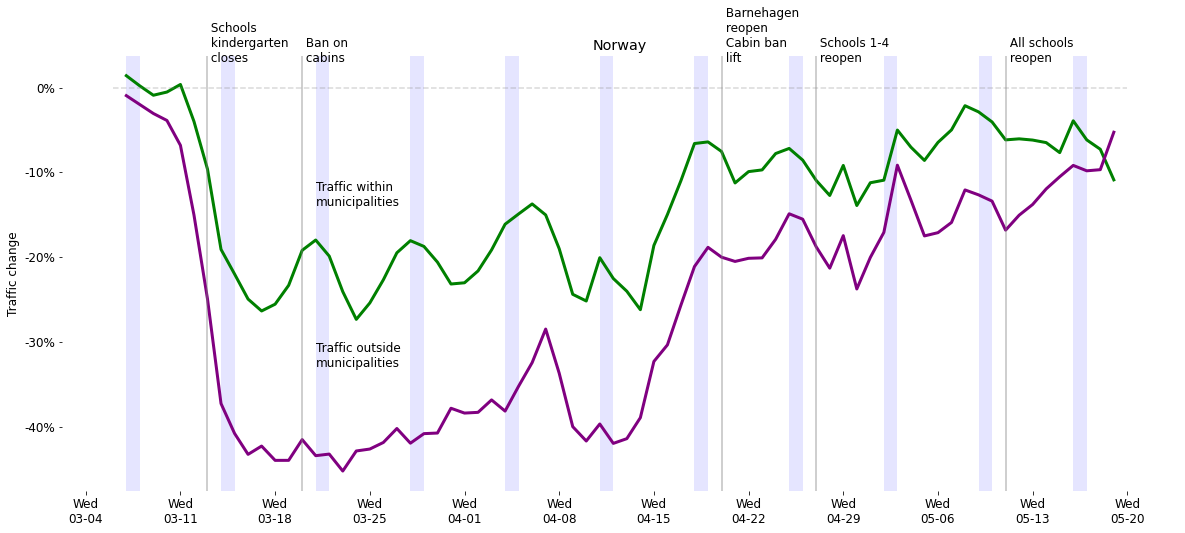

In [39]:

plt.rc('font', size=12) 
fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-06'
df_inner_ = df_inner[df_inner.utc_day >= start_date].sort_values('utc_day')
df_outer_ = df_outer[df_outer.utc_day >= start_date].sort_values('utc_day')
df_inner_['traffic_change_'] = df_inner_['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
df_outer_['traffic_change_'] = df_outer_['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)

ax.plot(df_inner_['utc_day'], df_inner_['traffic_change_'], label='inner traffic', color='green', lw=3)
ax.plot(df_outer_['utc_day'], df_outer_['traffic_change_'], label='outer traffic', color='purple', lw=3)

# Manual labels
ax.text('2020-03-21', -0.14, "Traffic within\nmunicipalities")
ax.text('2020-03-21', -0.33, "Traffic outside\nmunicipalities")

highlight_weekends(ax, df_inner_['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.5)
  plt.text(e, 0.03, events_no[e])


ax.set_ylim(ax.get_ylim())#[::-1])  
ax.set_ylabel('Traffic change')


plt.ylabel('Traffic change')
plt.title('Norway')
#plt.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_Traffic_reduction_inner_vs_outer.png')
plt.show()


In [0]:
df_inner_no = df_inner
df_outer_no = df_outer

# Distance travelled changes

We first looked at te number of trips, but what about the total distance traveled. Seems like the difference would be bigger, since longer trips are reduced most.

## Getting data - Norway AL2

In [0]:
country = 'no'
query = f"""    
SELECT
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code, SUM(people * distance_avg)  AS distance_travelled
FROM 
    `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal2_dal2_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_2` as mapo
  ON mapo.admin_level_2_code	= origin_area_code
-- WHERE mapo.admin_level_2 = 'Oslo' 
GROUP BY
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code
""" 

In [0]:
dal2 = pd.read_gbq(query, project_id='telia-ddi-no-prod')

In [43]:
dal2

utc_day  ... distance_travelled
0     2020-01-18 00:00:00+00:00  ...       7.834954e+08
1     2020-01-18 00:00:00+00:00  ...       1.761062e+09
2     2020-01-18 00:00:00+00:00  ...       3.738234e+08
3     2020-01-18 00:00:00+00:00  ...       3.546887e+07
4     2020-01-18 00:00:00+00:00  ...       1.071583e+09
...                         ...  ...                ...
59485 2020-05-15 00:00:00+00:00  ...       3.256128e+08
59486 2020-05-15 00:00:00+00:00  ...       6.549192e+08
59487 2020-05-15 00:00:00+00:00  ...       2.592344e+08
59488 2020-05-15 00:00:00+00:00  ...       1.003206e+08
59489 2020-05-15 00:00:00+00:00  ...       1.267382e+08

[59490 rows x 4 columns]

### Prepare dataset - all Norway

In [44]:
c_gb = dal2.groupby('utc_day')['distance_travelled'].sum().reset_index().sort_values('utc_day')
c_gb['weekday'] = c_gb['utc_day'].dt.weekday
c_gb

utc_day  distance_travelled  weekday
0   2020-01-01 00:00:00+00:00        2.553380e+11        2
1   2020-01-02 00:00:00+00:00        2.510143e+11        3
2   2020-01-03 00:00:00+00:00        2.512553e+11        4
3   2020-01-04 00:00:00+00:00        2.181137e+11        5
4   2020-01-05 00:00:00+00:00        2.244740e+11        6
..                        ...                 ...      ...
136 2020-05-16 00:00:00+00:00        1.894028e+11        5
137 2020-05-17 00:00:00+00:00        1.891661e+11        6
138 2020-05-18 00:00:00+00:00        2.081732e+11        0
139 2020-05-19 00:00:00+00:00        2.164626e+11        1
140 2020-05-20 00:00:00+00:00        2.708521e+11        2

[141 rows x 3 columns]

In [45]:
# Finding weekday median
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
gb = c_gb[c_gb['utc_day'] <= covid_date].groupby(['weekday']).agg({'distance_travelled': 'median'})
gb

distance_travelled
weekday                    
0              2.514778e+11
1              2.492230e+11
2              2.548949e+11
3              2.671890e+11
4              2.983225e+11
5              2.311144e+11
6              2.602532e+11

In [46]:
c_gb['diff_from_median'] = c_gb.distance_travelled - gb.loc[c_gb.weekday, 'distance_travelled'].reset_index(drop=True)
#df['sigma_from_median'] = np.abs(df['diff_from_median'] / gb.loc[list(zip(df.weekday, df.admin_level_2_code, df.admin_level_2)), ('trips', 'std')].reset_index(drop=True))
c_gb['ratio_from_median'] = c_gb.distance_travelled / gb.loc[c_gb.weekday, 'distance_travelled'].reset_index(drop=True)
c_gb['traffic_change'] = c_gb.ratio_from_median - 1.0
c_gb

utc_day  ...  traffic_change
0   2020-01-01 00:00:00+00:00  ...        0.001738
1   2020-01-02 00:00:00+00:00  ...       -0.060536
2   2020-01-03 00:00:00+00:00  ...       -0.157773
3   2020-01-04 00:00:00+00:00  ...       -0.056252
4   2020-01-05 00:00:00+00:00  ...       -0.137478
..                        ...  ...             ...
136 2020-05-16 00:00:00+00:00  ...       -0.180480
137 2020-05-17 00:00:00+00:00  ...       -0.273146
138 2020-05-18 00:00:00+00:00  ...       -0.172200
139 2020-05-19 00:00:00+00:00  ...       -0.131450
140 2020-05-20 00:00:00+00:00  ...        0.062603

[141 rows x 6 columns]

## All Norway plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


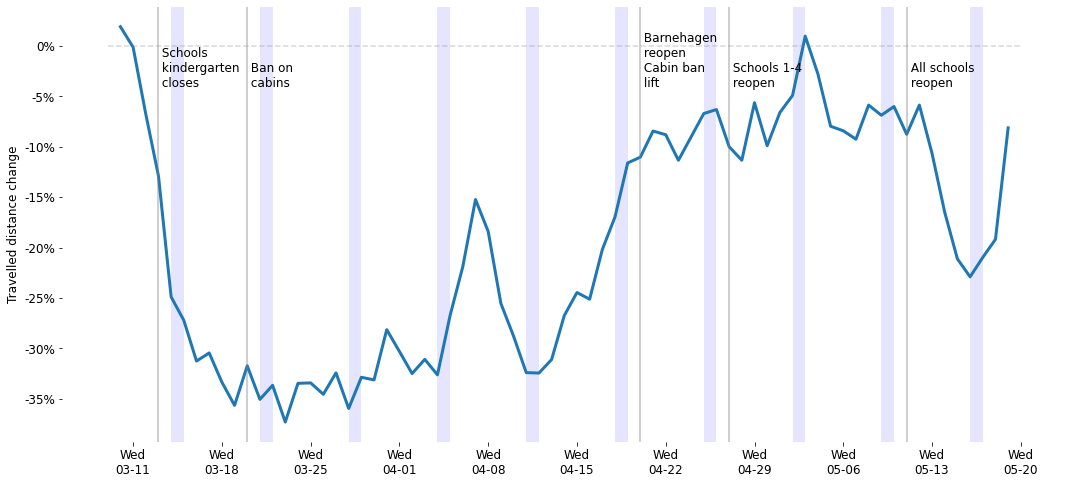

In [47]:
#colormap = cm.get_cmap('plasma', ntop)

fig, ax = plt.subplots(figsize=(18, 8))
start_date = '2020-03-09'

df__ = c_gb[c_gb.utc_day >= start_date]

df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
ax.plot(df__['utc_day'], df__['traffic_change_'], lw=3)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df__['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.5)
  plt.text(e, -0.04, events_no[e])
ax.set_ylabel('Travelled distance change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_travelled_distance_reduction.png')
plt.show()

In [48]:
2.492230e11 / 1.e3

249223000.0

In [0]:
45562.3 * 1e6 / 365

We find **250 millions km/day** whereas SSB reports **125 millions km/day** for "all road traffic" in 2019. The discrepancy seems quite large...

https://www.ssb.no/en/transport-og-reiseliv/statistikker/klreg/aar



## Prepare dataset - AL2

In [50]:
dal2['weekday'] = dal2['utc_day'].dt.weekday
dal2

utc_day  ... weekday
0     2020-01-18 00:00:00+00:00  ...       5
1     2020-01-18 00:00:00+00:00  ...       5
2     2020-01-18 00:00:00+00:00  ...       5
3     2020-01-18 00:00:00+00:00  ...       5
4     2020-01-18 00:00:00+00:00  ...       5
...                         ...  ...     ...
59485 2020-05-15 00:00:00+00:00  ...       4
59486 2020-05-15 00:00:00+00:00  ...       4
59487 2020-05-15 00:00:00+00:00  ...       4
59488 2020-05-15 00:00:00+00:00  ...       4
59489 2020-05-15 00:00:00+00:00  ...       4

[59490 rows x 5 columns]

In [51]:
# Sorting all Municipalities, by total distance travelled
al2_gb = dal2.groupby(['admin_level_2_code', 'admin_level_2'])['distance_travelled'].sum().reset_index().sort_values('distance_travelled', ascending=False)
al2_gb

admin_level_2_code admin_level_2  distance_travelled
263                301          Oslo        3.147586e+12
48                1201        Bergen        1.559951e+12
286               5001     Trondheim        8.282912e+11
258                235    Ullensaker        7.607718e+11
247                219         Bærum        6.234693e+11
..                 ...           ...                 ...
44                1151        Utsira        2.567588e+09
188               1857         Værøy        2.418902e+09
172               1835         Træna        1.271481e+09
77                1252       Modalen        1.259457e+09
187               1856          Røst        8.967980e+08

[422 rows x 3 columns]

In [52]:
# Finding weekday median
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
covid_date_start = pd.to_datetime('2020-02-20 00:00:00+00:00')
gb = dal2[(dal2['utc_day'] <= covid_date) & (dal2['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_2_code', 'admin_level_2']).agg({'distance_travelled': 'median'})
gb

distance_travelled
weekday admin_level_2_code admin_level_2                      
0       1001               Kristiansand           4.162067e+09
        1002               Mandal                 6.413059e+08
        1003               Farsund                4.103940e+08
        1004               Flekkefjord            3.211772e+08
        101                Halden                 1.522588e+09
...                                                        ...
6       935                Iveland                5.931866e+07
        937                Evje og Hornnes        3.204373e+08
        938                Bygland                1.239195e+08
        940                Valle                  2.995715e+08
        941                Bykle                  6.695581e+08

[2954 rows x 1 columns]

In [53]:
dal2['diff_from_median'] = dal2.distance_travelled - gb.loc[list(zip(dal2.weekday, dal2.admin_level_2_code, dal2.admin_level_2)), 'distance_travelled'].reset_index(drop=True)
#dal2['sigma_from_median'] = np.abs(dal2['diff_from_median'] / gb.loc[list(zip(dal2.weekday, df.admin_level_2_code, df.admin_level_2)), ('trips', 'std')].reset_index(drop=True))
dal2['ratio_from_median'] = dal2.distance_travelled / gb.loc[list(zip(dal2.weekday, dal2.admin_level_2_code, dal2.admin_level_2)), 'distance_travelled'].reset_index(drop=True)
dal2['traffic_change'] = dal2.ratio_from_median - 1.0
dal2

utc_day  ... traffic_change
0     2020-01-18 00:00:00+00:00  ...      -0.186688
1     2020-01-18 00:00:00+00:00  ...      -0.017071
2     2020-01-18 00:00:00+00:00  ...      -0.213985
3     2020-01-18 00:00:00+00:00  ...      -0.335708
4     2020-01-18 00:00:00+00:00  ...       0.087293
...                         ...  ...            ...
59485 2020-05-15 00:00:00+00:00  ...      -0.303280
59486 2020-05-15 00:00:00+00:00  ...      -0.166933
59487 2020-05-15 00:00:00+00:00  ...      -0.035253
59488 2020-05-15 00:00:00+00:00  ...      -0.332496
59489 2020-05-15 00:00:00+00:00  ...       0.020827

[59490 rows x 8 columns]

### Plot AL2

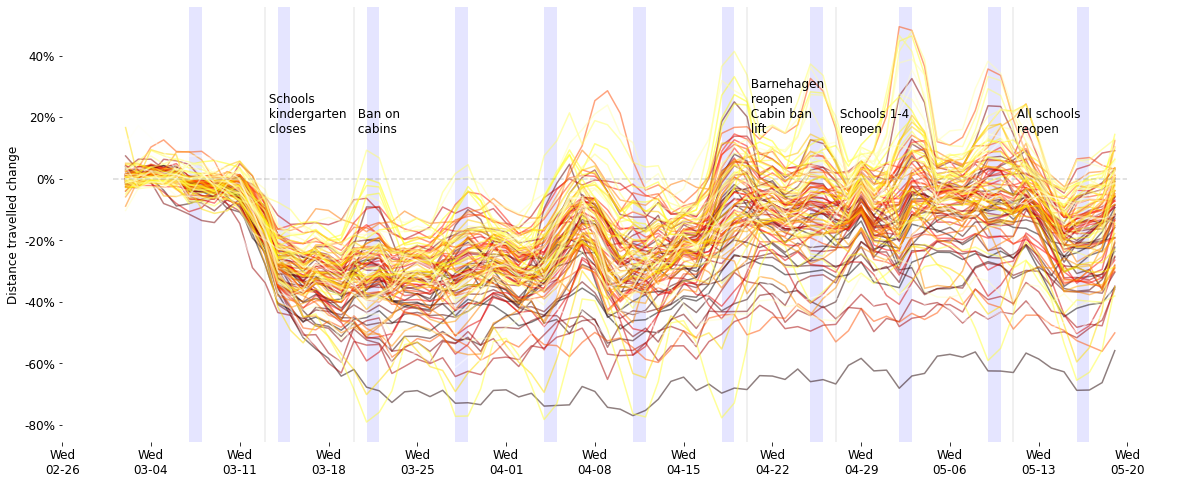

In [54]:
ntop = 100#15
df_ = dal2

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('hot', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
for i, m in enumerate(al2_gb.head(ntop)['admin_level_2_code'].values):
  df__ = df_[(df_.admin_level_2_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_2'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  ax.plot(df__['utc_day'], df__['traffic_change_'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.15, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_Inner_Traffic_reduction_top10_muni.png')
plt.show()

### without rolling window

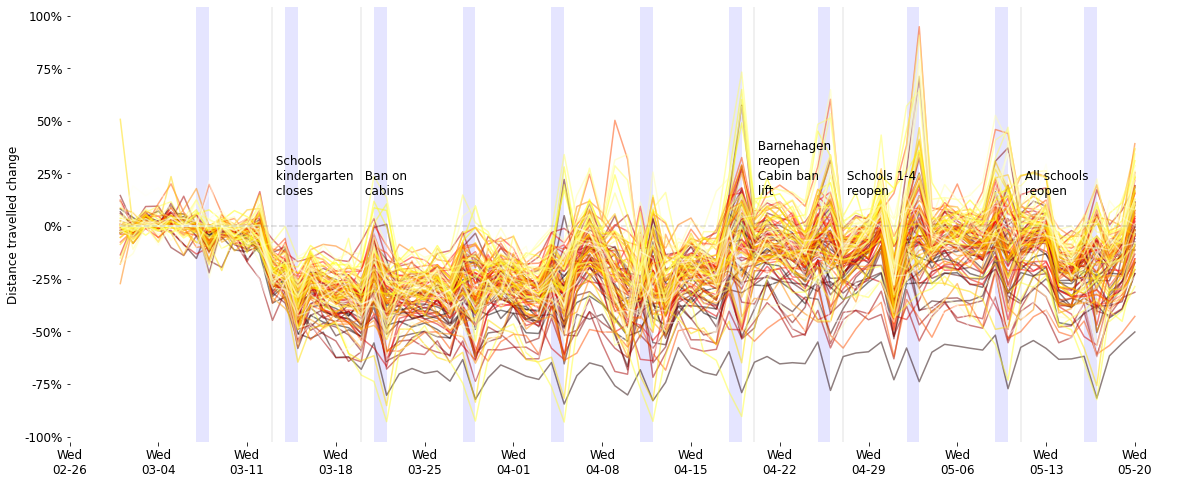

In [55]:
ntop = 100#15
df_ = dal2

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('hot', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
for i, m in enumerate(al2_gb.head(ntop)['admin_level_2_code'].values):
  df__ = df_[(df_.admin_level_2_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_2'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  ax.plot(df__['utc_day'], df__['traffic_change'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.15, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_Inner_Traffic_reduction_top10_muni.png')
plt.show()

In [56]:
!pip install mpld3

     |████████████████████████████████| 798kB 2.3MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=2b25a38fb7ea0d739f1f1e6ea1e2b9d73679db9569967fe968ed6dfd21ef1dcf
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


In [0]:
import mpld3
from mpld3 import plugins, utils

In [0]:
class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg)
                              .style("stroke-width", 5); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg)
                              .style("stroke-width", 1); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}

In [59]:
ntop = 100#15
df_ = dal2

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('winter', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
lines, labels = [], []

for i, m in enumerate(al2_gb.head(ntop)['admin_level_2_code'].values):
  df__ = df_[(df_.admin_level_2_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_2'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  l = ax.plot(df__['utc_day'], df__['traffic_change_'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)
  lines.append(l[0])
  labels.append(m_name)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.10, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)

plugins.connect(fig, HighlightLines(lines))
#plugins.connect(fig, VoronoiHighlightLines(lines))


for l, ll in zip(lines, labels):
    plugins.connect(fig, plugins.LineLabelTooltip(l, ll))
#tooltip = plugins.PointHTMLTooltip(points[0], labels,
#                                   voffset=10, hoffset=10, css=css)
#mpld3.plugins.connect(fig)#, tooltip)

mpld3.display()

/usr/local/lib/python3.6/dist-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


Note: Even the Voronoi highlight selector sucks... :/

In [0]:
class VoronoiHighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover
    
    
    see also http://bl.ocks.org/mbostock/8033015
    
    """

    JAVASCRIPT = """
    mpld3.register_plugin("voronoi_highlightlines", VoronoiHighlightLines);
    VoronoiHighlightLines.prototype = Object.create(mpld3.Plugin.prototype);
    VoronoiHighlightLines.prototype.constructor = VoronoiHighlightLines;
    VoronoiHighlightLines.prototype.requiredProps = ["line_ids"];
    VoronoiHighlightLines.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function VoronoiHighlightLines(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    VoronoiHighlightLines.prototype.draw = function(){
      var alpha_fg = this.props.alpha_fg;
      var alpha_bg = this.props.alpha_bg;    
      
      // get the data for the voronoi mesh
      data = new Array();
      for(var i=0; i<this.props.line_ids.length; i++){
         var line = mpld3.get_element(this.props.line_ids[i], this.fig);
         
         console.log()
         
         for (j=0; j<line.data.length; j++){
             var obj = {}
             obj.x = line.data[j][line.props.xindex]
             obj.y = line.data[j][line.props.yindex]
             obj.line = line
             obj.line_id = this.props.line_ids[i]
             obj.fig = this.fig
             data.push(obj)
         }
      }
        
      var ax = mpld3.get_element(this.props.line_ids[0], this.fig).ax

      // we hide the transform from data coordinates to svg
      // coordinates in the voronoi
      var transform_x = function(d){return ax.x(d)+ax.position[0]};
      var transform_y = function(d){return ax.y(d)+ax.position[1]};
      
      var voronoi = d3.geom.voronoi()
                    .x(function(d) { return transform_x(d.x); })
                    .y(function(d) { return transform_y(d.y); })      
                    .clipExtent([ax.position, [ax.position[0]+ax.width, ax.position[1]+ax.height]]);

      

      var voronoiGroup =  this.fig.canvas.append("svg:g")
                  .attr("class", "voronoi");
      
      voronoiGroup.selectAll("path")
          .data(voronoi(d3.nest()
                      .key(function(d) { return d.x + "," + d.y; })
                      .rollup(function(v) { return v[0]; })
                      .entries(data)
                      .map(function(d) { return d.values; })))
        .enter().append("path")
          .attr("d", function(d) { 
                    var ret = "M" + d.join(" L") + "Z";
                    return ret; })
          .datum(function(d) {return d.point; })
          .on("mouseover", mouseover)
          .on("mouseout", mouseout);
    
    
      function mouseover(d) {
        d3.select(d.line.path[0][0])
            .style("stroke-opacity", alpha_fg)
            .style("stroke-width", 5);        
      }

      function mouseout(d) {
         d3.select(d.line.path[0][0])
                .style("stroke-opacity", alpha_bg)
                .style("stroke-width", 1);  
      }    
    };
    """

    def __init__(self, lines, css=False):
        
        self.css_ = css or ""

        self.lines = lines
        self.dict_ = {"type": "voronoi_highlightlines",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}

In [0]:
country = 'no'
query = f"""    
SELECT
  utc_day, mapo.admin_level_2, mapo.admin_level_2_code, mapo.admin_level_4, mapo.admin_level_4_code, SUM(people * distance_avg)  AS distance_travelled
FROM 
    `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal4_dal4_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_4` as mapo
  ON mapo.admin_level_4_code	= origin_area_code
WHERE mapo.admin_level_2 = 'Oslo' 
GROUP BY
  utc_day, mapo.admin_level_4, mapo.admin_level_4_code, mapo.admin_level_2, mapo.admin_level_2_code
""" 

### Plotly

In [0]:
ntop = 100#15
start_date = '2020-03-01'

df_ = dal2
selected_muni = al2_gb.head(ntop)['admin_level_2_code'].values
df__ = df_[(df_.admin_level_2_code.isin(selected_muni)) & (df_.utc_day >= start_date)]
color_order = pd.DataFrame({'admin_level_2_code':selected_muni, 'color_index':range(ntop)})
df__ = df__.merge(color_order, on='admin_level_2_code')
df__ = df__.sort_values(['color_index', 'utc_day'])

In [0]:
import matplotlib

def mpl_to_plotly(cmap, pl_entries=11, rdigits=2):
    # cmap - colormap 
    # pl_entries - int = number of Plotly colorscale entries
    # rdigits - int -=number of digits for rounding scale values
    scale = np.linspace(0, 1, pl_entries)
    colors = (cmap(scale)[:, :3]*255).astype(np.uint8)
    pl_colorscale = [[round(s, rdigits), f'rgb{tuple(color)}'] for s, color in zip(scale, colors)]
    return pl_colorscale

def mpl_to_hex(map_name, n_colors):
    cmap = cm.get_cmap('winter', n_colors)
    c = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        c.append(matplotlib.colors.rgb2hex(rgb))
        #print(matplotlib.colors.rgb2hex(rgb))   
    return c


winter_cmap = matplotlib.cm.get_cmap('winter')
winter = mpl_to_plotly(winter_cmap, pl_entries=ntop)
winter_hex = mpl_to_hex('winter', ntop)

In [0]:
#winter[(0,0)]
df__['c'] = df__['color_index'].apply(lambda x: winter[x][1])
df__['c_'] = df__['color_index'] / ntop
##df__.color_index.values

In [65]:
import plotly.express as px
import datetime

#df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
fig = px.line(df__, x="utc_day", y="traffic_change", color="color_index",
              line_group="color_index", 
              hover_name="admin_level_2",
              color_discrete_sequence=["grey"],
              #color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'],#df__['c'],
              #color_discrete_sequence=px.colors.sequential.Plotly3,
                  #color_continuous_scale='ylgn' 
              )#color_continuous_scale = winter)

shapes=[]
#weekend_dates=trip_count_q2_2014[trip_count_q2_2014.is_weekend==1].start_Date
weekend_dates = df__[df__.utc_day.dt.weekday == 5].utc_day

box_color='blue'
for i in weekend_dates[::2]:
    shapes.append(
        {
            'type':'rect',
            'xref':'x',
            'x0':i,
            'x1':i+datetime.timedelta(days=1),
            'yref':'paper',
            'y0':0,
            'y1':1,
            'fillcolor': box_color,
            'opacity':0.004,
            'line': {
                'width': 0,
            }
        }
    )

#fig['layout'].update(
#    shapes=shapes
#)
fig.update_layout(shapes=shapes)
fig.update_layout(showlegend=False)
fig.update_layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False},
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  #colorscale='YlGn',
                  #colorway=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
                  )
fig.show()

#### Using Graph object

Otherwise the control on the plot is very limited...

In [0]:
al2_gb = al2_gb.head(ntop).reset_index(drop=True)

In [67]:
import plotly.graph_objects as go

fig = go.Figure()

for i, m in enumerate(al2_gb.head(ntop)['admin_level_2_code'].values):
  df_ = df__[(df__.admin_level_2_code == m)]
  m_name = df_['admin_level_2'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  #df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)

  fig.add_trace(go.Scatter(x=df_.utc_day, y=df_.traffic_change,
                      mode='lines',
                      name=df_['admin_level_2'].values[0],
                      opacity=0.5,
                      
                      line = dict(
                        color=winter_hex[i],
                      )
                      )
                      )
shapes=[]
#weekend_dates=trip_count_q2_2014[trip_count_q2_2014.is_weekend==1].start_Date
weekend_dates = df__[df__.utc_day.dt.weekday == 5].utc_day

box_color='blue'
for i in weekend_dates[::2]:
    shapes.append(
        {
            'type':'rect',
            'xref':'x',
            'x0':i,
            'x1':i+datetime.timedelta(days=1),
            'yref':'paper',
            'y0':0,
            'y1':1,
            'fillcolor': box_color,
            'opacity':0.004,
            'line': {
                'width': 0,
            }
        }
    )

#fig['layout'].update(
#    shapes=shapes
#)
fig.update_layout(shapes=shapes)
fig.update_layout(showlegend=False)
fig.update_layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False},
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  #colorscale='YlGn',
                  #colorway=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
                  )
fig.show()

## Getting data - Norway AL4

In [0]:
country = 'no'
query = f"""    
SELECT
  utc_day, mapo.admin_level_4, mapo.admin_level_4_code, SUM(people * distance_avg)  AS distance_travelled
FROM 
    `telia-ddi-no-prod.uc2020_mobility_insights.odm_daily_oal4_dal4_20200*`
JOIN `telia-ddi-no-prod.uc2020_maps.administrative_level_4` as mapo
  ON mapo.admin_level_4_code	= origin_area_code
WHERE mapo.admin_level_2 = 'Oslo' 
GROUP BY
  utc_day, mapo.admin_level_4, mapo.admin_level_4_code
""" 

In [0]:
dal4 = pd.read_gbq(query, project_id='telia-ddi-no-prod')

In [70]:
dal4

utc_day  ... distance_travelled
0     2020-03-22 00:00:00+00:00  ...        19958904.22
1     2020-03-22 00:00:00+00:00  ...        10675226.37
2     2020-03-22 00:00:00+00:00  ...        20629062.62
3     2020-03-22 00:00:00+00:00  ...        40836201.50
4     2020-03-22 00:00:00+00:00  ...         7752963.11
...                         ...  ...                ...
83083 2020-04-17 00:00:00+00:00  ...         6457898.91
83084 2020-04-17 00:00:00+00:00  ...        26315001.70
83085 2020-04-17 00:00:00+00:00  ...        58418315.18
83086 2020-04-17 00:00:00+00:00  ...        39565877.82
83087 2020-04-17 00:00:00+00:00  ...          553546.29

[83088 rows x 4 columns]

## Prepare dataset - AL4

In [0]:
dal4['weekday'] = dal4['utc_day'].dt.weekday

In [72]:
len(dal4.admin_level_4_code.unique())

591

In [73]:
# Sorting all Municipalities, by total distance travelled
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
covid_date_start = pd.to_datetime('2020-02-20 00:00:00+00:00')
al4_gb = dal4[(dal4['utc_day'] <= covid_date) & (dal4['utc_day'] >= covid_date_start)].groupby(['admin_level_4_code', 'admin_level_4'])['distance_travelled'].sum().reset_index().sort_values('distance_travelled', ascending=False)
al4_gb

admin_level_4_code       admin_level_4  distance_travelled
3              3010104   Sentrum 1 /rode 4        1.669018e+10
14             3010211  Sentrum 2 /rode 11        6.891209e+09
22             3010306   Sentrum 3 /rode 6        6.725062e+09
572            3015504             Sjølyst        6.303973e+09
4              3010105   Sentrum 1 /rode 5        5.741059e+09
..                 ...                 ...                 ...
272            3013318      Gjerdsrudhøgda        2.124570e+07
265            3013308          Grønliåsen        1.911486e+07
347            3013710             Lutvann        1.034226e+07
579            3015803          Mariholtet        1.676460e+06
586            3016003         Skjennungen        5.585514e+05

[591 rows x 3 columns]

In [74]:
# Finding weekday median
covid_date = pd.to_datetime('2020-03-11 00:00:00+00:00')
covid_date_start = pd.to_datetime('2020-02-20 00:00:00+00:00')
gb = dal4[(dal4['utc_day'] <= covid_date) & (dal4['utc_day'] >= covid_date_start)].groupby(['weekday', 'admin_level_4_code', 'admin_level_4']).agg({'distance_travelled': 'median'})
gb

distance_travelled
weekday admin_level_4_code admin_level_4                        
0       3010101            Sentrum 1 /rode 1        9.793453e+07
        3010102            Sentrum 1 /rode 2        3.066422e+08
        3010103            Sentrum 1 /rode 3        1.433498e+08
        3010104            Sentrum 1 /rode 4        7.796246e+08
        3010105            Sentrum 1 /rode 5        2.684060e+08
...                                                          ...
6       3016002            Maridalen                2.380965e+07
        3016004            Kobberhaugene            1.446207e+07
        3016005            Nordre Nordmarka         7.716934e+06
        3016006            Kikut                    6.769096e+05
        3016007            Movatn                   2.695283e+07

[4130 rows x 1 columns]

In [75]:
dal4['diff_from_median'] = dal4.distance_travelled - gb.loc[list(zip(dal4.weekday, dal4.admin_level_4_code, dal4.admin_level_4)), 'distance_travelled'].reset_index(drop=True)
dal4['ratio_from_median'] = dal4.distance_travelled / gb.loc[list(zip(dal4.weekday, dal4.admin_level_4_code, dal4.admin_level_4)), 'distance_travelled'].reset_index(drop=True)
dal4['traffic_change'] = dal4.ratio_from_median - 1.0
dal4

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:896: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



utc_day  ... traffic_change
0     2020-03-22 00:00:00+00:00  ...      -0.402079
1     2020-03-22 00:00:00+00:00  ...      -0.462949
2     2020-03-22 00:00:00+00:00  ...      -0.430214
3     2020-03-22 00:00:00+00:00  ...      -0.380234
4     2020-03-22 00:00:00+00:00  ...      -0.630239
...                         ...  ...            ...
83083 2020-04-17 00:00:00+00:00  ...      -0.237715
83084 2020-04-17 00:00:00+00:00  ...      -0.465106
83085 2020-04-17 00:00:00+00:00  ...      -0.632624
83086 2020-04-17 00:00:00+00:00  ...      -0.326055
83087 2020-04-17 00:00:00+00:00  ...       0.236926

[83088 rows x 8 columns]

### Plot AL4

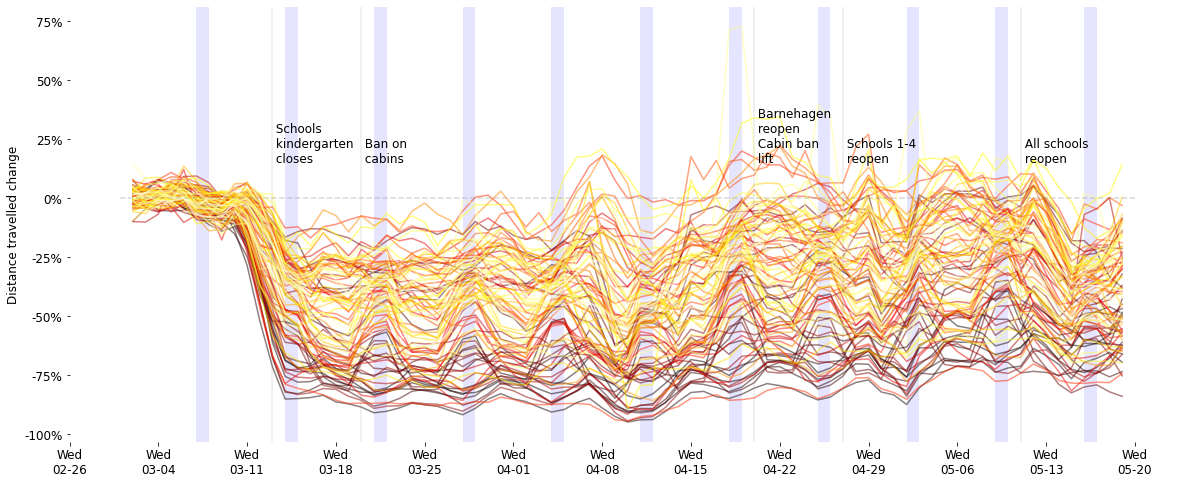

In [76]:
ntop = 100#15
df_ = dal4

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('hot', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
for i, m in enumerate(al4_gb.head(ntop)['admin_level_4_code'].values):
  df__ = df_[(df_.admin_level_4_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_4'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  ax.plot(df__['utc_day'], df__['traffic_change_'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.15, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_AL4_Traffic_reduction_top100.png')
plt.show()

### without rolling window

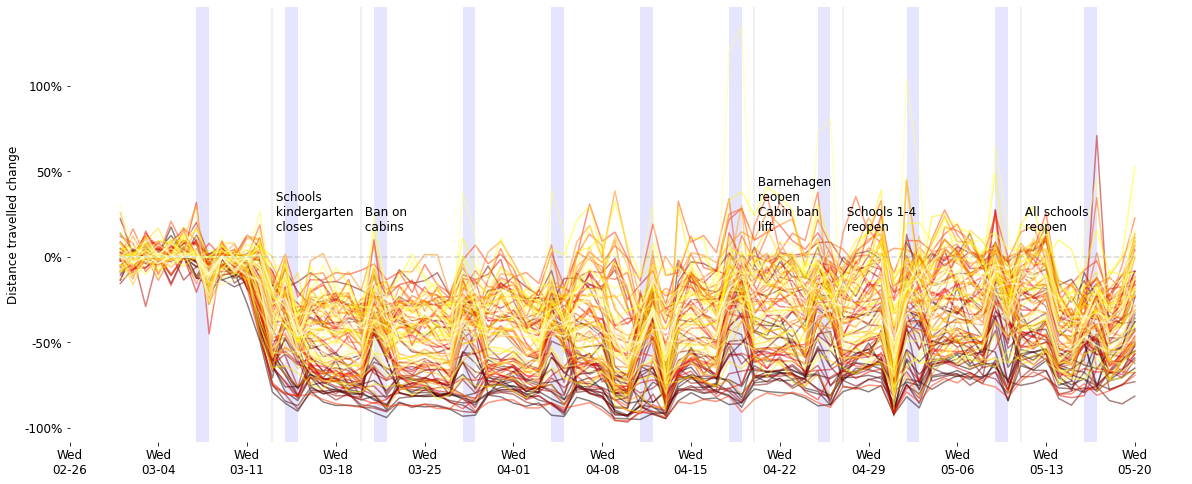

In [77]:
ntop = 100#15
df_ = dal4

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('hot', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
for i, m in enumerate(al4_gb.head(ntop)['admin_level_4_code'].values):
  df__ = df_[(df_.admin_level_4_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_4'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  #df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  ax.plot(df__['utc_day'], df__['traffic_change'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.15, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)
plt.savefig(f'{drive_folder}{country}_AL4_Traffic_reduction_top100.png')
plt.show()

In [78]:
!pip install mpld3

In [0]:
import mpld3
from mpld3 import plugins, utils

In [0]:
class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg)
                              .style("stroke-width", 5); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg)
                              .style("stroke-width", 1); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}

In [81]:
ntop = 100#15
df_ = dal4

#colormap = cm.get_cmap('plasma', ntop)
colormap = cm.get_cmap('winter', ntop)
#colormap = cm.get_cmap('Greys', ntop)

fig, ax = plt.subplots(figsize=(20, 8))
start_date = '2020-03-01'
lines, labels = [], []

for i, m in enumerate(al4_gb.head(ntop)['admin_level_4_code'].values):
  df__ = df_[(df_.admin_level_4_code == m) & (df_.utc_day >= start_date)]
  df__ = df__.sort_values('utc_day')
  m_name = df__['admin_level_4'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
  l = ax.plot(df__['utc_day'], df__['traffic_change_'], label=m_name, 
          #color='grey' 
          color=colormap(i)
        #, lw=3
        , alpha=0.5)
  lines.append(l[0])
  labels.append(m_name)

highlight_weekends(ax, df__['utc_day'])
ax.plot([pd.to_datetime(start_date), df_['utc_day'].max()], [0, 0], '--', c='grey', alpha=0.3)

# Date format
date_form = DateFormatter("%a\n%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# Percent units
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Annotate main events
"""events = {'13-03-2020':' Schools/kindergarten\n closes',
          '16-03-2020':' Closes additional\n businesses',
          '20-03-2020':' Ban on\n cabins'}"""
for e in events_no:
  ax.axvline(x=e, ymin=0, ymax=1, color = 'grey', alpha = 0.15)
  plt.text(e, 0.10, events_no[e])
ax.set_ylabel('Distance travelled change')

ax.set_ylim(ax.get_ylim())#[::-1])
#ax.legend(frameon=False)
plt.box(False)

plugins.connect(fig, HighlightLines(lines))
#plugins.connect(fig, VoronoiHighlightLines(lines))


for l, ll in zip(lines, labels):
    plugins.connect(fig, plugins.LineLabelTooltip(l, ll))
#tooltip = plugins.PointHTMLTooltip(points[0], labels,
#                                   voffset=10, hoffset=10, css=css)
#mpld3.plugins.connect(fig)#, tooltip)

mpld3.display()

/usr/local/lib/python3.6/dist-packages/mpld3/mplexporter/exporter.py:84: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.



Note: Even the Voronoi highlight selector sucks... :/

In [0]:
class VoronoiHighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover
    
    
    see also http://bl.ocks.org/mbostock/8033015
    
    """

    JAVASCRIPT = """
    mpld3.register_plugin("voronoi_highlightlines", VoronoiHighlightLines);
    VoronoiHighlightLines.prototype = Object.create(mpld3.Plugin.prototype);
    VoronoiHighlightLines.prototype.constructor = VoronoiHighlightLines;
    VoronoiHighlightLines.prototype.requiredProps = ["line_ids"];
    VoronoiHighlightLines.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function VoronoiHighlightLines(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    VoronoiHighlightLines.prototype.draw = function(){
      var alpha_fg = this.props.alpha_fg;
      var alpha_bg = this.props.alpha_bg;    
      
      // get the data for the voronoi mesh
      data = new Array();
      for(var i=0; i<this.props.line_ids.length; i++){
         var line = mpld3.get_element(this.props.line_ids[i], this.fig);
         
         console.log()
         
         for (j=0; j<line.data.length; j++){
             var obj = {}
             obj.x = line.data[j][line.props.xindex]
             obj.y = line.data[j][line.props.yindex]
             obj.line = line
             obj.line_id = this.props.line_ids[i]
             obj.fig = this.fig
             data.push(obj)
         }
      }
        
      var ax = mpld3.get_element(this.props.line_ids[0], this.fig).ax

      // we hide the transform from data coordinates to svg
      // coordinates in the voronoi
      var transform_x = function(d){return ax.x(d)+ax.position[0]};
      var transform_y = function(d){return ax.y(d)+ax.position[1]};
      
      var voronoi = d3.geom.voronoi()
                    .x(function(d) { return transform_x(d.x); })
                    .y(function(d) { return transform_y(d.y); })      
                    .clipExtent([ax.position, [ax.position[0]+ax.width, ax.position[1]+ax.height]]);

      

      var voronoiGroup =  this.fig.canvas.append("svg:g")
                  .attr("class", "voronoi");
      
      voronoiGroup.selectAll("path")
          .data(voronoi(d3.nest()
                      .key(function(d) { return d.x + "," + d.y; })
                      .rollup(function(v) { return v[0]; })
                      .entries(data)
                      .map(function(d) { return d.values; })))
        .enter().append("path")
          .attr("d", function(d) { 
                    var ret = "M" + d.join(" L") + "Z";
                    return ret; })
          .datum(function(d) {return d.point; })
          .on("mouseover", mouseover)
          .on("mouseout", mouseout);
    
    
      function mouseover(d) {
        d3.select(d.line.path[0][0])
            .style("stroke-opacity", alpha_fg)
            .style("stroke-width", 5);        
      }

      function mouseout(d) {
         d3.select(d.line.path[0][0])
                .style("stroke-opacity", alpha_bg)
                .style("stroke-width", 1);  
      }    
    };
    """

    def __init__(self, lines, css=False):
        
        self.css_ = css or ""

        self.lines = lines
        self.dict_ = {"type": "voronoi_highlightlines",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}

### Plotly

In [0]:
ntop = 100#15
start_date = '2020-03-01'

df_ = dal4
selected_muni = al4_gb.head(ntop)['admin_level_4_code'].values
df__ = df_[(df_.admin_level_4_code.isin(selected_muni)) & (df_.utc_day >= start_date)]
color_order = pd.DataFrame({'admin_level_4_code':selected_muni, 'color_index':range(ntop)})
df__ = df__.merge(color_order, on='admin_level_4_code')
df__ = df__.sort_values(['color_index', 'utc_day'])

In [0]:
import matplotlib

def mpl_to_plotly(cmap, pl_entries=11, rdigits=2):
    # cmap - colormap 
    # pl_entries - int = number of Plotly colorscale entries
    # rdigits - int -=number of digits for rounding scale values
    scale = np.linspace(0, 1, pl_entries)
    colors = (cmap(scale)[:, :3]*255).astype(np.uint8)
    pl_colorscale = [[round(s, rdigits), f'rgb{tuple(color)}'] for s, color in zip(scale, colors)]
    return pl_colorscale

def mpl_to_hex(map_name, n_colors):
    cmap = cm.get_cmap('winter', n_colors)
    c = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        c.append(matplotlib.colors.rgb2hex(rgb))
        #print(matplotlib.colors.rgb2hex(rgb))   
    return c


winter_cmap = matplotlib.cm.get_cmap('winter')
winter = mpl_to_plotly(winter_cmap, pl_entries=ntop)
winter_hex = mpl_to_hex('winter', ntop)

In [0]:
#winter[(0,0)]
df__['c'] = df__['color_index'].apply(lambda x: winter[x][1])
df__['c_'] = df__['color_index'] / ntop
##df__.color_index.values

In [86]:
import plotly.express as px
import datetime

#df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)
fig = px.line(df__, x="utc_day", y="traffic_change", color="color_index",
              line_group="color_index", 
              hover_name="admin_level_4",
              color_discrete_sequence=["grey"],
              #color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'],#df__['c'],
              #color_discrete_sequence=px.colors.sequential.Plotly3,
                  #color_continuous_scale='ylgn' 
              )#color_continuous_scale = winter)

shapes=[]
#weekend_dates=trip_count_q2_2014[trip_count_q2_2014.is_weekend==1].start_Date
weekend_dates = df__[df__.utc_day.dt.weekday == 5].utc_day

box_color='blue'
for i in weekend_dates[::2]:
    shapes.append(
        {
            'type':'rect',
            'xref':'x',
            'x0':i,
            'x1':i+datetime.timedelta(days=1),
            'yref':'paper',
            'y0':0,
            'y1':1,
            'fillcolor': box_color,
            'opacity':0.004,
            'line': {
                'width': 0,
            }
        }
    )

#fig['layout'].update(
#    shapes=shapes
#)
fig.update_layout(shapes=shapes)
fig.update_layout(showlegend=False)
fig.update_layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False},
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  #colorscale='YlGn',
                  #colorway=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
                  )
fig.show()

#### Using Graph object

Otherwise the control on the plot is very limited...

In [0]:
al4_gb = al4_gb.head(ntop).reset_index(drop=True)

In [88]:
import plotly.graph_objects as go

fig = go.Figure()

for i, m in enumerate(al4_gb.head(ntop)['admin_level_4_code'].values):
  df_ = df__[(df__.admin_level_4_code == m)]
  m_name = df_['admin_level_4'].values[0]
  #df__['traffic_reduction_'] = df__['traffic_reduction'].rolling(5).mean()
  #df__['traffic_change_'] = df__['traffic_change'].rolling(3, win_type='gaussian', center=True).mean(std=3)

  fig.add_trace(go.Scatter(x=df_.utc_day, y=df_.traffic_change,
                      mode='lines',
                      name=df_['admin_level_4'].values[0],
                      opacity=0.5,
                      
                      line = dict(
                        color=winter_hex[i],
                      )
                      )
                      )
shapes=[]
#weekend_dates=trip_count_q2_2014[trip_count_q2_2014.is_weekend==1].start_Date
weekend_dates = df__[df__.utc_day.dt.weekday == 5].utc_day

box_color='blue'
for i in weekend_dates[::2]:
    shapes.append(
        {
            'type':'rect',
            'xref':'x',
            'x0':i,
            'x1':i+datetime.timedelta(days=1),
            'yref':'paper',
            'y0':0,
            'y1':1,
            'fillcolor': box_color,
            'opacity':0.004,
            'line': {
                'width': 0,
            }
        }
    )

#fig['layout'].update(
#    shapes=shapes
#)
fig.update_layout(shapes=shapes)
fig.update_layout(showlegend=False)
fig.update_layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False},
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  #colorscale='YlGn',
                  #colorway=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
                  )
fig.show()

# May 3rd traffic change vs number of cabins

We notice a travel distance spike on Thursday April 30th, a dip on May 1st (Labor day) and a huge spike on Sunday May 3, in some municipality - does it correlate with areas with cabins?

SSB statistics: https://www.ssb.no/en/statbank/table/05467/

In [91]:
df_ = dal2
len(df_.admin_level_2_code.unique())

422

In [0]:
b = pd.read_csv(drive_folder + 'Fribygg.csv', sep=';', header=1, encoding = 'latin')

In [93]:
b['admin_level_2_code'], b['admin_level_2_'] = b.region.str.split(' ', 1).str
b['admin_level_2_code'] = b['admin_level_2_code'].astype(int)
b.sort_values('Number of holiday houses 2020')

region  ...      admin_level_2_
0        0101 Halden (-2019)  ...      Halden (-2019)
232  1418 Balestrand (-2019)  ...  Balestrand (-2019)
231         1417 Vik (-2019)  ...         Vik (-2019)
230    1416 Høyanger (-2019)  ...    Høyanger (-2019)
229   1413 Hyllestad (-2019)  ...   Hyllestad (-2019)
..                       ...  ...                 ...
307      5027 Midtre Gauldal  ...      Midtre Gauldal
40    0301 Oslo municipality  ...   Oslo municipality
336                1804 Bodø  ...                Bodø
305               5025 Røros  ...               Røros
301              5021 Oppdal  ...              Oppdal

[423 rows x 5 columns]

In [94]:
df_ = dal2
df_['admin_level_2_code'] = df_['admin_level_2_code'].astype(int)
df_m = df_.merge(b, on='admin_level_2_code', how='left')
df_m

utc_day  ...                 admin_level_2_
0     2020-01-18 00:00:00+00:00  ...              Nannestad (-2019)
1     2020-01-18 00:00:00+00:00  ...              Hamar (1992-2019)
2     2020-01-18 00:00:00+00:00  ...                Målselv (-2019)
3     2020-01-18 00:00:00+00:00  ...                Lebesby (-2019)
4     2020-01-18 00:00:00+00:00  ...                      Haugesund
...                         ...  ...                            ...
59485 2020-05-15 00:00:00+00:00  ...                          Rauma
59486 2020-05-15 00:00:00+00:00  ...               Eidsberg (-2019)
59487 2020-05-15 00:00:00+00:00  ...                         Frosta
59488 2020-05-15 00:00:00+00:00  ...  Kárásjohka - Karasjok (-2019)
59489 2020-05-15 00:00:00+00:00  ...                          Dønna

[59490 rows x 12 columns]

In [95]:
df_may3 = df_m[(df_m.utc_day == '2020-05-03 00:00:00+00:00')]
#df_may3 = df_[(df_.utc_day >= '2020-05-02 ') & (df_.utc_day <= '2020-05-04')]
df_may3

utc_day  ...    admin_level_2_
3034  2020-05-03 00:00:00+00:00  ...              Time
3035  2020-05-03 00:00:00+00:00  ...  Høyanger (-2019)
3036  2020-05-03 00:00:00+00:00  ...   Granvin (-2019)
3037  2020-05-03 00:00:00+00:00  ...   Seljord (-2019)
3038  2020-05-03 00:00:00+00:00  ...    Luster (-2019)
...                         ...  ...               ...
58291 2020-05-03 00:00:00+00:00  ...  Kvalsund (-2019)
58292 2020-05-03 00:00:00+00:00  ...  Flesberg (-2019)
58293 2020-05-03 00:00:00+00:00  ...     Bykle (-2019)
58294 2020-05-03 00:00:00+00:00  ...     Tolga (-2019)
58295 2020-05-03 00:00:00+00:00  ...     Vadsø (-2019)

[422 rows x 12 columns]

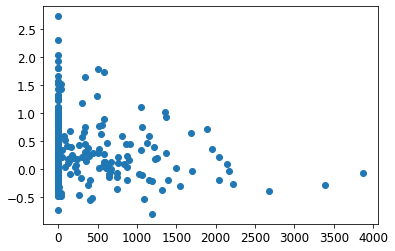

In [96]:
plt.scatter(df_may3['Number of holiday houses 2020'], df_may3['traffic_change'])

In [97]:
df_may3.sort_values('traffic_change', ascending=False).head(50)

utc_day  ...            admin_level_2_
11781 2020-05-03 00:00:00+00:00  ...           Lebesby (-2019)
16077 2020-05-03 00:00:00+00:00  ...           Kragerø (-2019)
32888 2020-05-03 00:00:00+00:00  ...           Forsand (-2019)
45421 2020-05-03 00:00:00+00:00  ...          Roan (2018-2019)
11786 2020-05-03 00:00:00+00:00  ...          Eidfjord (-2019)
32867 2020-05-03 00:00:00+00:00  ...    Snillfjord (2018-2019)
7498  2020-05-03 00:00:00+00:00  ...                 Flatanger
3054  2020-05-03 00:00:00+00:00  ...                     Lurøy
45428 2020-05-03 00:00:00+00:00  ...            Hvaler (-2019)
20229 2020-05-03 00:00:00+00:00  ...                      Osen
41176 2020-05-03 00:00:00+00:00  ...       Tvedestrand (-2019)
32871 2020-05-03 00:00:00+00:00  ...                    Utsira
11772 2020-05-03 00:00:00+00:00  ...           Modalen (-2019)
24285 2020-05-03 00:00:00+00:00  ...                     Træna
24292 2020-05-03 00:00:00+00:00  ...             Risør (-2019)
3058  2020-05-03 00:00:00+00:00  ...         Hitra (2018-2019)
20235 2020-05-03 00:00:00+00:00  ...               Vik (-2019)
3052  2020-05-03 00:00:00+00:00  ...                     Rødøy
24283 2020-05-03 00:00:00+00:00  ...               Lom (-2019)
11798 2020-05-03 00:00:00+00:00  ...        Åfjord (2018-2019)
37065 2020-05-03 00:00:00+00:00  ...             Skjåk (-2019)
20228 2020-05-03 00:00:00+00:00  ...         Lindesnes (-2019)
37068 2020-05-03 00:00:00+00:00  ...                   Sokndal
54062 2020-05-03 00:00:00+00:00  ...            Solund (-2019)
28568 2020-05-03 00:00:00+00:00  ...                Hjelmeland
54074 2020-05-03 00:00:00+00:00  ...       Agdenes (2018-2019)
28564 2020-05-03 00:00:00+00:00  ...           Norddal (-2019)
49720 2020-05-03 00:00:00+00:00  ...              Nome (-2019)
7516  2020-05-03 00:00:00+00:00  ...         Vegårshei (-2019)
28561 2020-05-03 00:00:00+00:00  ...                      Aure
20232 2020-05-03 00:00:00+00:00  ...             Dyrøy (-2019)
20237 2020-05-03 00:00:00+00:00  ...           Svelvik (-2019)
49712 2020-05-03 00:00:00+00:00  ...           Farsund (-2019)
54069 2020-05-03 00:00:00+00:00  ...           Aremark (-2019)
32863 2020-05-03 00:00:00+00:00  ...        Masfjorden (-2019)
45418 2020-05-03 00:00:00+00:00  ...             Gulen (-2019)
58286 2020-05-03 00:00:00+00:00  ...        Færder (2018-2019)
20238 2020-05-03 00:00:00+00:00  ...                    Tysvær
24293 2020-05-03 00:00:00+00:00  ...          Rendalen (-2019)
45410 2020-05-03 00:00:00+00:00  ...            Tranøy (-2019)
32869 2020-05-03 00:00:00+00:00  ...            Tysnes (-2019)
28565 2020-05-03 00:00:00+00:00  ...            Bamble (-2019)
41161 2020-05-03 00:00:00+00:00  ...                    Beiarn
3061  2020-05-03 00:00:00+00:00  ...             Søgne (-2019)
32879 2020-05-03 00:00:00+00:00  ...         Bjugn (2018-2019)
45436 2020-05-03 00:00:00+00:00  ...            Siljan (-2019)
16071 2020-05-03 00:00:00+00:00  ...       Stor-Elvdal (-2019)
24296 2020-05-03 00:00:00+00:00  ...            Jondal (-2019)
41184 2020-05-03 00:00:00+00:00  ...  Hamarøy - Hábmer (-2019)
24286 2020-05-03 00:00:00+00:00  ...    Ullensvang (1977-2019)

[50 rows x 12 columns]

In [0]:
df_may3_ = df_may3[df_may3.admin_level_2_code.isin(al2_gb.head(ntop)['admin_level_2_code'].values)]

In [101]:
df_may3.sort_values('traffic_change', ascending=False)['admin_level_2'].tolist()

['Lebesby',
 'Kragerø',
 'Forsand',
 'Roan',
 'Eidfjord',
 'Snillfjord',
 'Flatanger',
 'Lurøy',
 'Hvaler',
 'Osen',
 'Tvedestrand',
 'Utsira',
 'Modalen',
 'Træna',
 'Risør',
 'Hitra',
 'Vik',
 'Rødøy',
 'Lom',
 'Åfjord',
 'Skjåk',
 'Lindesnes',
 'Sokndal',
 'Solund',
 'Hjelmeland',
 'Agdenes',
 'Norddal',
 'Nome',
 'Vegårshei',
 'Aure',
 'Dyrøy',
 'Svelvik',
 'Farsund',
 'Aremark',
 'Masfjorden',
 'Gulen',
 'Færder',
 'Tysvær',
 'Rendalen',
 'Tranøy',
 'Tysnes',
 'Bamble',
 'Beiarn',
 'Søgne',
 'Bjugn',
 'Siljan',
 'Stor-Elvdal',
 'Jondal',
 'Hamarøy - Hábmer',
 'Ullensvang',
 'Etne',
 'Lillesand',
 'Frosta',
 'Hurum',
 'Luster',
 'Lødingen',
 'Flekkefjord',
 'Smøla',
 'Mandal',
 'Frøya',
 'Lyngdal',
 'Suldal',
 'Iveland',
 'Berg',
 'Kvinnherad',
 'Larvik',
 'Bygland',
 'Finnøy',
 'Nesset',
 'Åmli',
 'Vevelstad',
 'Høyanger',
 'Bremanger',
 'Dønna',
 'Bømlo',
 'Loabák - Lavangen',
 'Radøy',
 'Strand',
 'Torsken',
 'Råde',
 'Hemne',
 'Steigen',
 'Halsa',
 'Kvitsøy',
 'Askvoll',
 'Vind

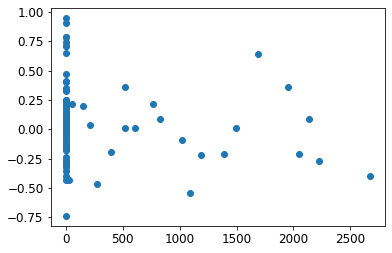

In [100]:
plt.scatter(df_may3_['Number of holiday houses 2020'], df_may3_['traffic_change'])